In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(2021)
from sklearn.metrics import ConfusionMatrixDisplay
import torch

In [2]:
dictionary = torch.load('data.pt')
train_images = (dictionary['train_images'] >= 0.5).float()
train_labels = 2 * dictionary['train_labels'] - 1
test_images = (dictionary['test_images'] >= 0.5).float()
test_labels = 2 * dictionary['test_labels'] - 1

In [3]:
def perceptron(X, Y, w, max_iter, eta=0.01):
    X = Y * X
    convergence = False
    iter = 0

    while not convergence and iter < max_iter:
        incorrect = X @ w < 0
        w += eta * X[incorrect].sum(axis=0)

        convergence = not incorrect.any()
        iter += 1

    incorrect = X @ w < 0
    return convergence, incorrect.sum() / X.shape[0], iter

In [4]:
w = rng.normal(size=train_images.shape[1])

In [5]:
results = perceptron(train_images.numpy(), train_labels[:, None].numpy(), w, 1000)
print('(converged, error, iterations):', results)

(converged, error, iterations): (False, 0.01250403355921265, 1000)


In [6]:
print('Train classification error:', ((train_labels[:, None] * train_images @ w) < 0).float().mean().item())
print('Test classification error:', ((test_labels[:, None] * test_images @ w) < 0).float().mean().item())

Train classification error: 0.012504033744335175
Test classification error: 0.02453385666012764


In [7]:
ConfusionMatrixDisplay.from_predictions(
    test_labels, test_images @ w >= 0, normalize='true',
)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

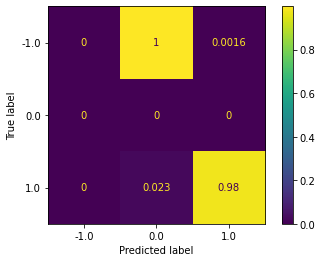

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    train_labels, train_images @ w >= 0, normalize='true',
)

In [ ]:
w.argmin()

124

In [ ]:
def weights_to_literals(w, precision=8):
    w_normalized = w / np.abs(w).max()
    w_quantized = (w_normalized * (2 ** precision - 1)).astype(int)
    w_literals = map(lambda w: f'9\'d{(-special_sign(w) + 1) * 2 ** (precision - 1) + np.abs(w)}', w_quantized)
    w_bits = list(w_literals)[::-1]
    
    return ','.join(w_bits)

def special_sign(w):
    if w == 0:
        return 1
    else:
        return np.sign(w)
weights_to_literals(w)

In [ ]:
s = np.array([0 for i in range(784)])
s[0] = 1
s[1] = -1
s_literals = weights_to_literals(s)
s_literals

"9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0,9'd0